# Dataset sul Traffico di Rete

Il dataset che useremo in questa esercitazione contiene caratteristiche estratte da sessioni di traffico di rete, progettate per l'analisi e il rilevamento di malware basato sul comportamento della rete. Le caratteristiche sono organizzate in diverse categorie funzionali.

## Categorie principali di caratteristiche

### Informazioni sulla sessione
- **Informazioni temporali**: `start`, `duration`, `cap_date`, `daysTime`, `weekDay`
- **Informazioni di connessione**: Indirizzi IP e porte (`...ip`, `...port`)
- **Etichette**: `label`, `labelSS` (classificazione del malware)

### Metriche TCP/IP
- **Statistiche pacchetti**: Conteggio pacchetti (`packets_...`), dimensioni (`packetsize...`), rapporti (`packetsAB_ratio`)
- **Flag TCP**: Pacchetti ACK (`ack_...`), PUSH (`push_...`), RESET (`reset_...`), URG (`urg_...`)
- **Tempi di arrivo**: Tempi tra pacchetti (`packetinterarrivel_...`)
- **Time-to-live**: Valori TTL per pacchetti client/server (`ttl_...`, `ttlA...`, `ttlB...`)
- **Analisi TCP**: Pacchetti persi, ritrasmessi (`tcpanalysis...`)
- **Bytes trasferiti**: Totali e rapporti (`bytes_...`, `bytesAB_ratio`)

### Protocollo HTTP
- **Richieste HTTP**: Metodi GET/POST (`http_GET`, `http_POST`), conteggi (`httpcount...`)
- **Bytes HTTP**: Dimensioni richieste/risposte (`httpreqbytes_...`, `httprespbytes_...`)
- **Tempi HTTP**: Tempi di risposta (`httptime...`), tempi tra richiesta e risposta (`httpinterarrivel_...`)
- **Cookie**: Conteggio e valori (`httpcookiecount`, `httpcookievalues_...`)
- **Host dominante**: URL, rank Alexa, tipo di browser (`httpdom...`)
- **Classificazione URL**: Identificatori per CDN, ad, cloud, ecc. (`iscdnhttp`, `isadhttp`, `iscloudhttp`, etc.)

### Protocollo DNS
- **Risposta DNS**: Conteggio indirizzi, risposte, flag (`dnscountaddresses`, `dns_flag`)
- **Hostname DNS**: Nome host, TTL (`dnshostname`, `dnsminttl`)
- **Tempi DNS**: Tempo di risposta (`dns_time`)
- **Rank Alexa**: Rank del server nella risposta DNS (`dns_alexaRank`)

### Protocollo SSL/TLS
- **Handshake SSL**: Durata (`sslhandshakeduration_...`)
- **Bytes SSL**: Bytes richiesta/risposta (`sslreqbytes_...`, `sslrespbytes_...`)
- **Certificati**: Conteggio, rapporti (`sslcountcertificates`, `sslratio...`)
- **Cifrari e algoritmi**: Conteggio cifrari supportati (`sslcountclient_...`, `sslcountserver_...`)
- **Versioni SSL**: Numero di versioni, versione dominante (`ssldomserver_ciphersuite`, `ssldomserver_compression`)

### Informazioni geografiche e di routing
- **ASN**: Numero di sistemi autonomi (`asn_...`)
- **Paesi**: Numero di paesi per client/server (`country_...`)


# Obiettivo
  Classificare un dispositivo come dispositivo di sicurezza o no. Vedi colonna `is_security_device`

In [1]:
import pandas as pd
df = pd.read_csv('../datasets/iot_device_binary_transformed.csv')

### Stampiamo le colonne

In [2]:
df.columns

Index(['ack', 'ack_A', 'ack_B', 'bytes', 'bytes_A', 'bytes_A_B_ratio',
       'bytes_B', 'ds_field_A', 'ds_field_B', 'duration',
       ...
       'suffix_is_co.il', 'suffix_is_com', 'suffix_is_com.sg',
       'suffix_is_else', 'suffix_is_empty_char_value',
       'suffix_is_googleapis.com', 'suffix_is_net', 'suffix_is_org',
       'suffix_is_unresolved', 'is_security_device'],
      dtype='object', length=298)

### Vediamo che tipologia di valori dobbiamo classificare

In [3]:
df["is_security_device"]

0      1
1      1
2      1
3      1
4      1
      ..
895    0
896    0
897    0
898    0
899    0
Name: is_security_device, Length: 900, dtype: int64

#### Abbiamo uni e zeri. Quindi indicano delle classi discrete
Vediamo se il dataset è bilanciato

In [4]:
df['is_security_device'].value_counts()

is_security_device
0    500
1    400
Name: count, dtype: int64

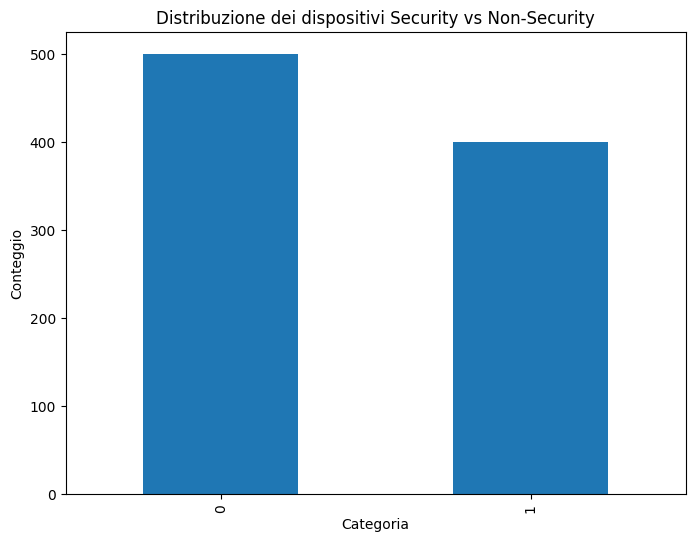

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df['is_security_device'].value_counts().plot(kind='bar')
plt.title('Distribuzione dei dispositivi Security vs Non-Security')
plt.xlabel('Categoria')
plt.ylabel('Conteggio')
plt.show()

### Proviamo a filtrare qualche colonna in base al modulo della correlazione

In [6]:
# Calcolo le correlazioni con la variabile target
correlations = df.corrwith(df['is_security_device'])
# Filtro le features con correlazione superiore a 0.3 in valore assoluto
significant_features = correlations[abs(correlations) > 0.3].index.tolist()
# Rimuovo la variabile target dall'elenco delle features se presente
if 'is_security_device' in significant_features:
    significant_features.remove('is_security_device')

# Creao un nuovo DataFrame con solo le features significative e la variabile target
df = df[significant_features + ['is_security_device']]
# Visualizzare le dimensioni del nuovo DataFrame
print(f"Dimensioni del nuovo DataFrame: {df.shape}")
print(f"Features selezionate: {len(significant_features)}")

Dimensioni del nuovo DataFrame: (900, 44)
Features selezionate: 43


c:\Users\luigi\python\ML_Course_2025\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\luigi\python\ML_Course_2025\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [7]:
df.head()

,ds_field_B,http_GET,http_count_host,http_count_req_content_type,http_count_resp_code,http_count_resp_content_type,http_count_user_agents,http_has_req_content_type,http_has_resp_content_type,http_has_user_agent,...,ttl_stdev,ttl_var,is_http,B_port_is_11095,B_port_is_80,B_port_is_8080,subdomain_is_else,domain_is_else,suffix_is_empty_char_value,is_security_device
0,0,0,0,0,0,0,0,0,0,0,...,80.973083,6556.640244,0,0,0,0,1,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,81.470988,6637.521951,0,0,0,0,1,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,82.466290,6800.689024,0,0,0,0,1,1,0,1
3,0,0,0,0,0,0,0,0,0,0,...,82.495610,6805.525610,0,0,0,0,1,1,0,1
4,0,0,0,0,0,0,0,0,0,0,...,82.801553,6856.097252,0,0,0,0,1,1,0,1


Abbiamo tanti zeri e uni... Contiamo se ci sono null e filtriamo orizzontalmente in base alla varianza di ogni colonna

In [8]:
# Verifica dei valori NaN
nan_counts = df.isna().sum()
print(f"Colonne con valori NaN:")
print(nan_counts[nan_counts > 0])

Colonne con valori NaN:
Series([], dtype: int64)


In [9]:
import pandas as pd
import numpy as np

def normalize_variance(df):
        return df.var() / df.max()

# Calcola la varianza normalizzata
varianza_norm = normalize_variance(df)

# Ordina le colonne in base alla varianza normalizzata (dal più alto al più basso)
varianza_ordinata = varianza_norm.sort_values(ascending=False)

# Seleziona i nomi delle prime 10 colonne con varianza più alta
top_10_colonne = varianza_ordinata.head(10).index.tolist()

# Stampa i nomi e i valori delle prime 10 colonne
print("Top 10 colonne con varianza normalizzata più alta:")
for colonna in top_10_colonne:
    print(f"{colonna}: {varianza_norm[colonna]}")


df_top_10 = df[top_10_colonne]


Top 10 colonne con varianza normalizzata più alta:
ttl_var: 1330.9850883452973
http_inter_arrivel_sum: 269.3767468676106
http_inter_arrivel_max: 150.37803549357778
http_inter_arrivel_thirdQ: 44.37273343996672
http_inter_arrivel_avg: 40.66207708211984
http_req_bytes_median: 35.821965151623125
http_req_bytes_firstQ: 35.821965151623125
http_req_bytes_max: 35.821965151623125
http_req_bytes_avg: 35.821965151623125
http_req_bytes_thirdQ: 35.821965151623125


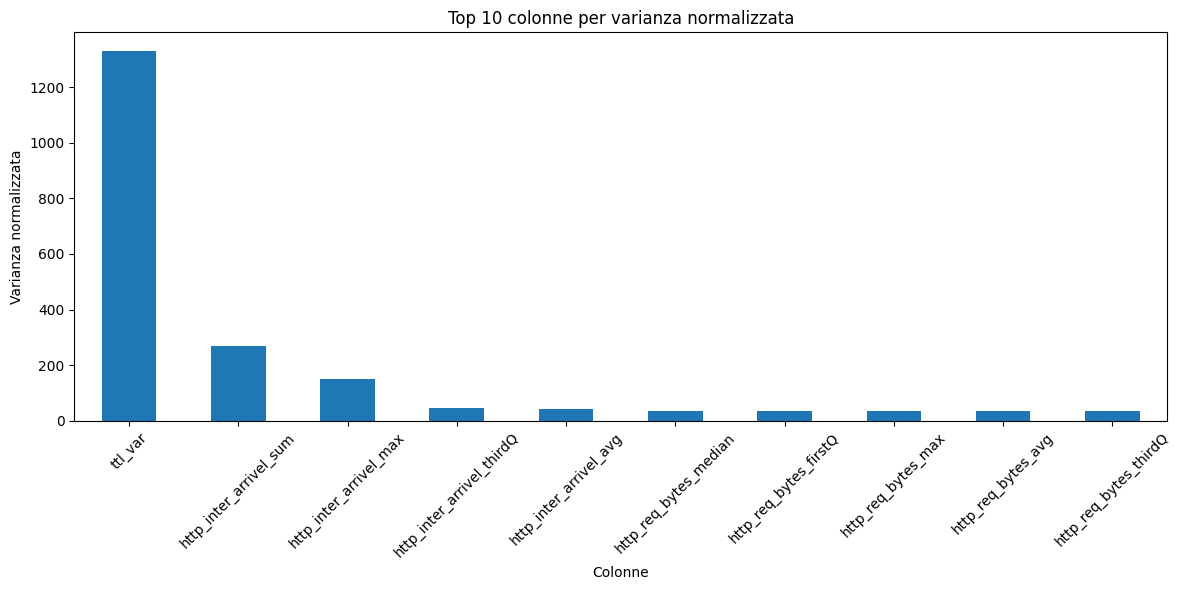

In [10]:
import matplotlib.pyplot as plt

# Visualizza le top 10 colonne con un grafico a barre
plt.figure(figsize=(12, 6))
varianza_ordinata.head(10).plot(kind='bar')
plt.title('Top 10 colonne per varianza normalizzata')
plt.ylabel('Varianza normalizzata')
plt.xlabel('Colonne')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
df_top_10["is_security_device"] = df['is_security_device']
cleaned_df = df_top_10

C:\Users\luigi\AppData\Local\Temp\ipykernel_161268\2700016466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_10["is_security_device"] = df['is_security_device']


In [12]:
cleaned_df

,ttl_var,http_inter_arrivel_sum,http_inter_arrivel_max,http_inter_arrivel_thirdQ,http_inter_arrivel_avg,http_req_bytes_median,http_req_bytes_firstQ,http_req_bytes_max,http_req_bytes_avg,http_req_bytes_thirdQ,is_security_device
0,6556.640244,2840.981562,1547.304718,694.86998,648.797378,0,0,0,0,0,1
1,6637.521951,2840.981562,1547.304718,694.86998,648.797378,0,0,0,0,0,1
2,6800.689024,2840.981562,1547.304718,694.86998,648.797378,0,0,0,0,0,1
3,6805.525610,2840.981562,1547.304718,694.86998,648.797378,0,0,0,0,0,1
4,6856.097252,2840.981562,1547.304718,694.86998,648.797378,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
895,30.192024,2840.981562,1547.304718,694.86998,648.797378,0,0,0,0,0,0
896,28.615385,2840.981562,1547.304718,694.86998,648.797378,0,0,0,0,0,0
897,39.084416,2840.981562,1547.304718,694.86998,648.797378,0,0,0,0,0,0
898,33.516129,2840.981562,1547.304718,694.86998,648.797378,0,0,0,0,0,0


In [13]:
from sklearn.model_selection import train_test_split
# Dividi il dataframe in set di addestramento e test
X = cleaned_df.drop(columns=['is_security_device'])
y = cleaned_df['is_security_device']

# Utilizza train_test_split per dividere i dati
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualizza le dimensioni dei set di addestramento e test
print(f"Dimensioni del set di addestramento: {X_train.shape}")
print(f"Dimensioni del set di test: {X_test.shape}")

Dimensioni del set di addestramento: (720, 10)
Dimensioni del set di test: (180, 10)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

import matplotlib.pyplot as plt

# Inizializza il modello di Regressione Logistica
logistic_model = LogisticRegression(random_state=42, max_iter=10000)

# Addestra il modello
logistic_model.fit(X_train, y_train)

# Effettua le predizioni sul set di test
y_pred = logistic_model.predict(X_test)

# Calcola e stampa le metriche di valutazione
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8111
